In [2]:
import os
import sys
import config as cfg
import time
import copy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import itertools

from datetime import datetime  
from datetime import timedelta 


from fastai.old.fastai.imports import *
from fastai.old.fastai.structured import *

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

#from fastai.old.fastai.imports import *
#from fastai.old.fastai.structured import *

%matplotlib inline
sns.set()

In [3]:
PROJECT_NAME = 'TimeSeriesKb'
PROJECT_START_DATE = '28/06/19' #ENGLISH DATE FORMAT
PROJECT_END_DATE = '' #ENGLISH DATE FORMAT

In [4]:
config = cfg.privateConfig(cfg.OS, PROJECT_NAME)

The haribo package provides the following functions to use in Jupyter:

set_screen_width() - sets cells to be 90% of screen width

show_df(dataFrame, allRows = False) - shows all columns of a dataFrame when displayed

pickle_it(data, path) - safely pickles a file

from_pickle_jar(path) - safely loads a pickled file



In [5]:
from CodeCandy.haribo import jupyter as candy

# Import Data and format

In [10]:
dfRaw = pd.read_csv(
    os.path.join(config.PROJECT_ROOT, 'Data', 'raw.csv'),
    parse_dates=['Date', 'ClassTime'],
    dayfirst=True,
    index_col='Date', 
    dtype={
        'AcademicYear':np.int32,
        'Week': np.int32,
        'HeadCount': np.int32,
        'PaidCount': np.int32,
        'GradingNumber': np.int32
    }
)

dfRaw['year'] = [d.year for d in dfRaw.index]
dfRaw['month'] = [d.strftime('%b') for d in dfRaw.index]

In [11]:
candy.show_df(dfRaw)

,AcademicYear,Week,HeadCount,PaidCount,CashTaken,ClassTime,Venue,Event,Social,GradingNumber,year,month
Date,,,,,,,,,,,,
2011-09-27,2011,1,26,0,0.0,6pm,Sugden,First Class,NaN,0,2011,Sep
2011-09-29,2011,1,42,0,0.0,6.30pm,Sugden,NaN,NaN,0,2011,Sep
2011-10-04,2011,2,33,33,128.7,6pm,Sugden,NaN,NaN,0,2011,Oct
2011-10-06,2011,2,33,33,128.7,6.30pm,Sugden,NaN,NaN,0,2011,Oct
2011-10-11,2011,3,27,27,105.3,6pm,Sugden,NaN,NaN,0,2011,Oct
2011-10-13,2011,3,42,42,163.8,6.30pm,Sugden,NaN,NaN,0,2011,Oct
2011-10-18,2011,4,21,21,81.9,6pm,Sugden,NaN,NaN,0,2011,Oct
2011-10-20,2011,4,32,32,124.8,6.30pm,Sugden,NaN,NaN,0,2011,Oct
2011-10-25,2011,5,23,23,89.7,6pm,Sugden,NaN,NaN,0,2011,Oct


(453, 12)


# Linear Regression

## Prepare Data

In [17]:
[df,y,nas] = proc_df(dfRaw[['Week','Venue','Event','HeadCount']],y_fld='HeadCount')

In [22]:
X=pd.get_dummies(dfRaw[['Week','Venue','Event']],drop_first=True)
y=dfRaw['HeadCount']

In [29]:
m = LinearRegression().fit(X,y)
residuals = y - m.predict(X)

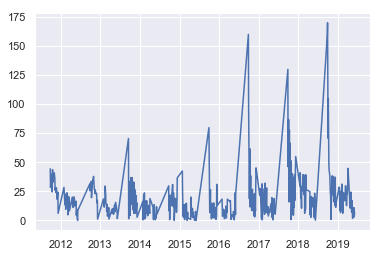

In [32]:
plt.plot(np.sqrt(residuals**2))

In [33]:
np.sqrt(residuals**2)

Date
2011-09-27    44.338402
2011-09-29    28.338402
2011-10-04    35.428175
2011-10-06    35.428175
2011-10-11    39.517949
2011-10-13    24.517949
2011-10-18    43.607722
2011-10-20    32.607722
2011-10-25    39.697496
2011-10-27    35.697496
2011-11-01    39.787269
2011-11-03    40.787269
2011-11-08    35.877043
2011-11-10    25.877043
2011-11-15    27.966817
2011-11-17    23.966817
2011-11-22    28.056590
2011-11-24    26.056590
2011-11-29    18.146364
2011-12-01    20.146364
2011-12-06    24.236137
2011-12-08     6.090297
2012-01-31    28.325911
2012-02-02    25.325911
2012-02-07    17.415684
2012-02-09    13.415684
2012-02-14    22.505458
2012-02-16     9.505458
2012-02-21    21.595232
2012-02-23    14.595232
                ...    
2019-02-07    31.225221
2019-02-12    12.135448
2019-02-14     6.135448
2019-02-19    20.045674
2019-02-21    24.045674
2019-02-26    16.955901
2019-02-28    18.955901
2019-03-05    19.866127
2019-03-07    16.866127
2019-03-12    29.776353
2019-03-14 

# ARIMA

In [34]:
decomposition = sm.tsa.seasonal_decompose(residuals, model='additive', extrapolate_trend='freq')

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None